## *santoshhulbutti@gmail.com | DataTrained | Practice Project # 06

## Advertising Sales Channel Prediction

<h1 align="center"> Objective : Advertising Sales Channel Prediction </h1>
<h2> This will be a <u><font color = "green">supervised ML model</font></u> as the dataset has <u><font color = "green">'label' column</font></u> i.e., 'sales'. it will be a <u><font color ='blue'>Regression problem - predicting the total sales through all the channels of Advertising</font></u>
    
performance metrics will be :
<font color ='purple'> mean_squared_error, mean_absolute_error, r2_score</font>
</h2>

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox

import statsmodels.formula.api as smf

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
#storing the file path/ url path in a variable
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv"

#make dataframe of the data
df0 = pd.read_csv(url)

<h1 align="center"><font color = "red">Data Preprocessing & EDA</font> </h1>

<h2><font color = "blue">01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info()</font></h2>

In [3]:
#read top 5 rows of the data
df0.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#read last 5 rows of the data
df0.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(200, 5)
 
Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Observation:
the data set has 200 rows of data & 5 Columns

1. The first Column is Unnamed.. No mention of this column in Problem description so its irrelevant We will drop it.
2. TV, Radio, Newspaper & sales Columns are float variables(continuous data)

In [7]:
df0.drop('Unnamed: 0', axis=1, inplace=True)

<h2><font color = "blue">02. Checking for duplicate entries...</font></h2>

In [8]:
df0.duplicated().sum()

0

#### Observation:
1. in our data there are no duplicate entries.

<h2><font color = "blue">03. Checking for descriptive statistics...</font></h2>

In [9]:
df0.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Observations:
1. All 3 featues(TV, radio, newspaper) are continuous data.
2. Sales is the target variable, it is also continuous data.
3. TV Column has high standard deviation value
3. in Newspaper, difference between 75th percentile and max is huge.
3. radio having zero as minimum value in data.

<h2><font color = "blue">04. Checking for missing & null values...</font></h2>

In [10]:
#total missing values
df0.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
# % of missing values
df0.isnull().sum()*100/df0.shape[0]

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

### Observations:
Data set has no missing value/null value.

<h2><font color = "blue">05. Checking entries with ZERO Value...</font></h2>

In [12]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

### Observation:
1. Radio feature having one entry as zero. we will look into it in later stage.

### renaming column names to remove whitespaces...

In [13]:
columns = df0.columns.tolist()
columns_renamed = [column.strip().replace(" ", "_").lower() for column in columns]
df0.columns = columns_renamed
df0.columns

Index(['tv', 'radio', 'newspaper', 'sales'], dtype='object')

<h2 align="center"><font color = "red">EDA : Numerical Feature Analysis...</font> </h2>

In [14]:
#Copying dataframe
df1 = df0.copy()

<h2><font color = "blue">06. Data Visualization...</font></h2>

## Univariate Analysis

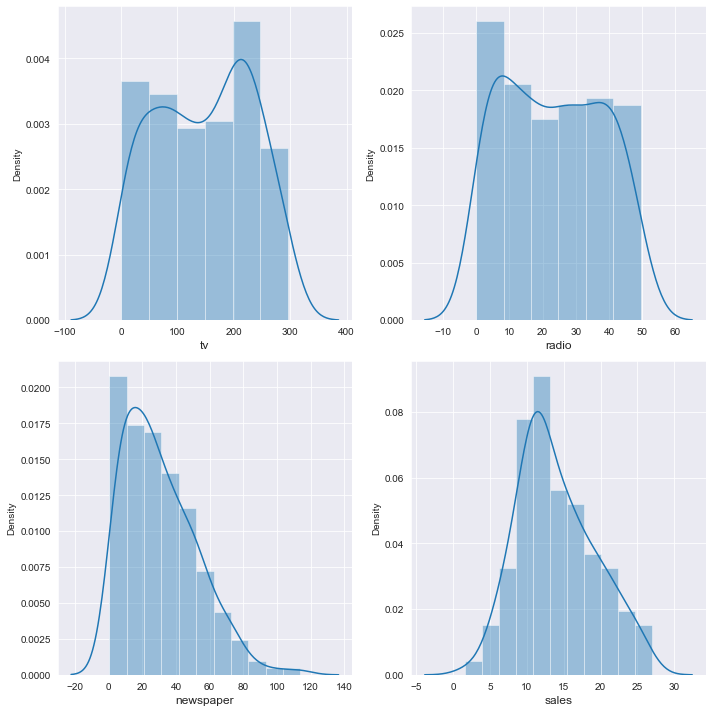

In [15]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(10,10))
for column in df1[['tv', 'radio', 'newspaper', 'sales']].columns:
    plt.subplot(2,2,i+1)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation
1. Newspaper has skewness present.
2. TV & radio features are similarly distributed but not normally distributed.

## Bivariate Analysis

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

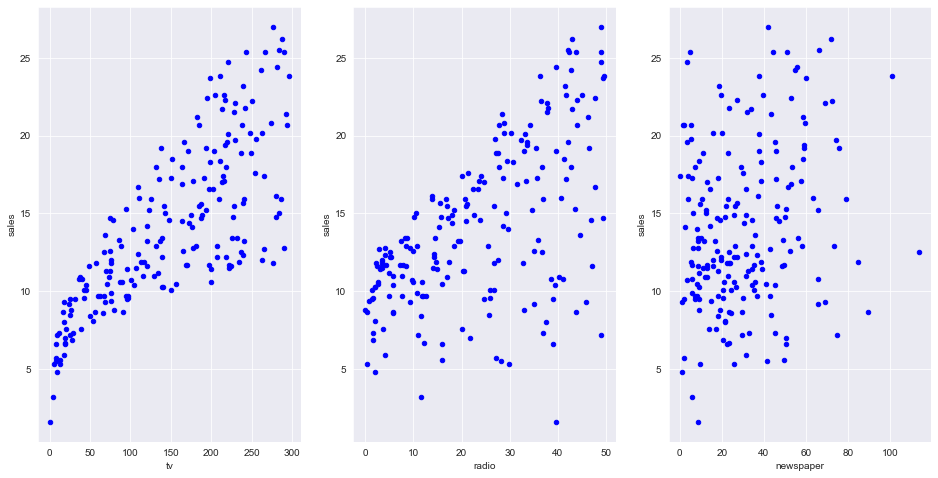

In [16]:
fig, axs = plt.subplots(1, 3)
df1.plot(kind='scatter', x='tv', y='sales', color = 'blue', ax=axs[0], figsize=(16, 8))
df1.plot(kind='scatter', x='radio', y='sales', color = 'blue', ax=axs[1])
df1.plot(kind='scatter', x='newspaper', y='sales', color = 'blue', ax=axs[2])

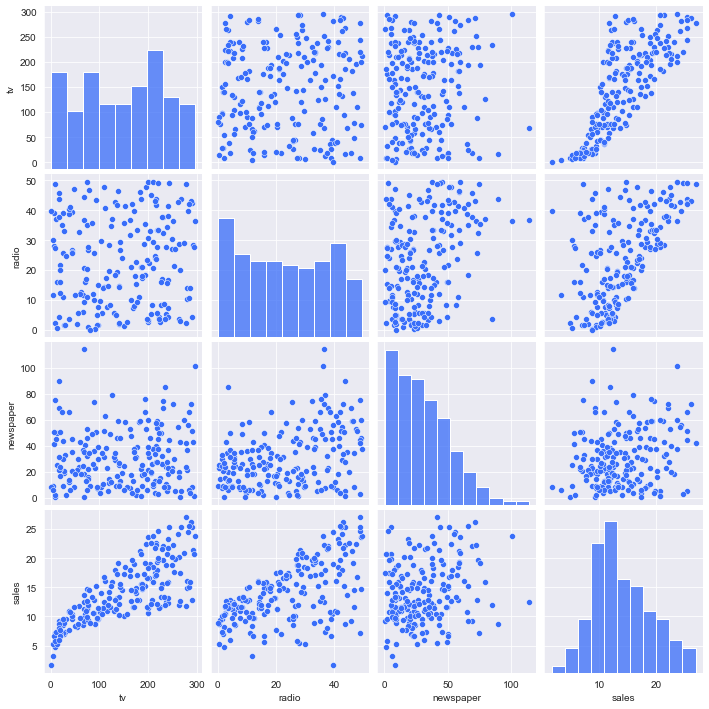

In [17]:
sns.set_palette('rainbow')
sns.pairplot(df1)

### Observation
1. TV & Radio are having almost a linear relationship with Sales,
2. Newspaper doesnt show any relation, need to do further analysis.

<h2><font color = "blue">07. Checking outliers...</font></h2>

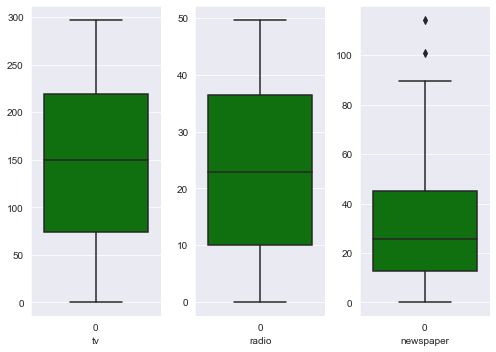

In [18]:
collist=df1[['tv', 'radio', 'newspaper']].columns.values

plt.figure(figsize=(7,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df1[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

In [19]:
df2 = df1.copy()

In [20]:
z=np.abs(zscore(df2))
df3=df2[(z<3).all(axis=1)]
data_loss=((df2.shape[0]-df3.shape[0])/df2.shape[0])*100
print("data loss ", data_loss, " %")

data loss  1.0  %


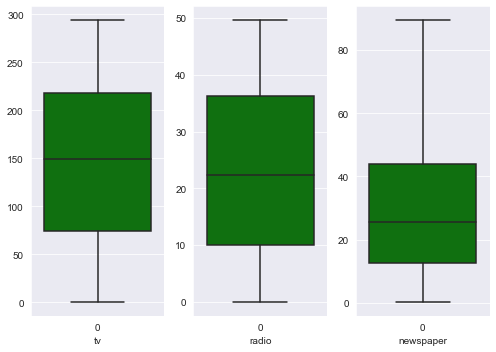

In [21]:
collist=df3[['tv', 'radio', 'newspaper']].columns.values

plt.figure(figsize=(7,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df3[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

### Observation
1. There were 2 outliers removed from Newspaper columns
2. Data loss after removing outliers is : 1%

<h2><font color = "blue">08. Checking Skewness...</font></h2>

In [22]:
df3.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
df3.shape

(198, 4)

In [24]:
df3.skew()

tv          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

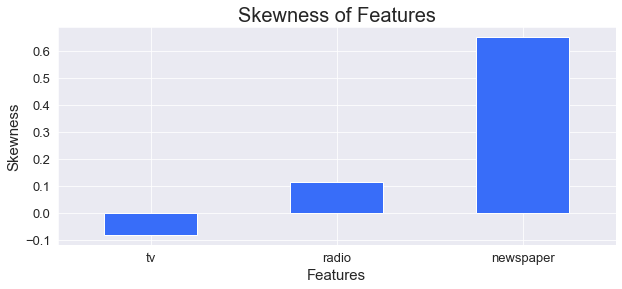

In [25]:
plt.figure(figsize=(10,4))
df3.skew().drop(['sales']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

### Observation
1. Newspaper have some skewness. we will remove it using boxcox transformation

In [26]:
df4 = df3.copy()

In [27]:
df4['newspaper']=boxcox(df4['newspaper'],0.5)

In [28]:
df4.skew()

tv          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

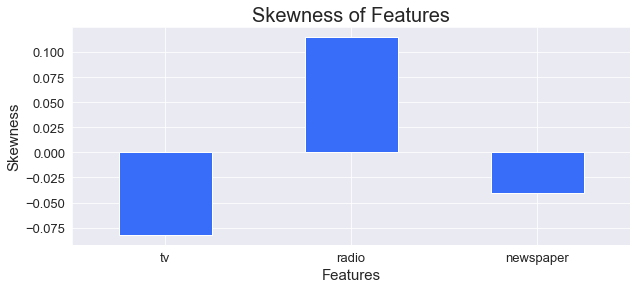

In [29]:
plt.figure(figsize=(10,4))
df4.skew().drop(['sales']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

### Observation
1. skewness in Newspaper is removed. & all other features are well within skewness of +/-0.5.

<h2><font color = "blue">09. Checking Correlation & Multicollinearity...</font></h2>

## Correlation..

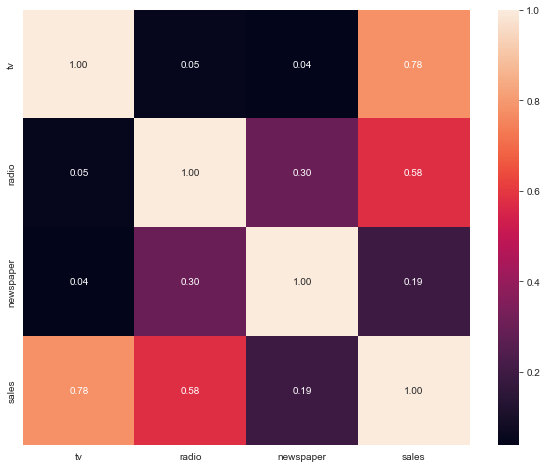

In [30]:
#Heatmap of numerical columns
plt.figure(figsize = (10, 8))
sns.heatmap(df4[['tv', 'radio', 'newspaper', 'sales']].corr(),annot=True, fmt = ".2f")
plt.show()

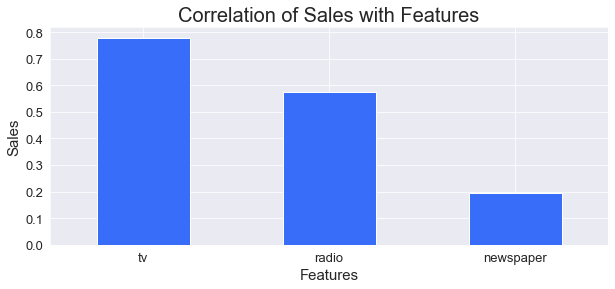

In [31]:
plt.figure(figsize=(10,4))
df4.corr()['sales'].drop(['sales']).plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('Correlation of Sales with Features', fontsize=20)
plt.show()

In [32]:
df4.corr()['sales']

tv           0.779121
radio        0.576748
newspaper    0.194153
sales        1.000000
Name: sales, dtype: float64

### Observation
1. TV & Radio columns show high correlation with sales column than newspaper.

## Multicoliinearity..

In [33]:
#checking for multicollinearity by using vif
scaler = StandardScaler()
features = df4.drop('sales',axis=1)
scaled = scaler.fit_transform(features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled, i)for i in range(len(features.columns))]
vif['features']=features.columns
vif.set_index('features', inplace=True)

<Figure size 720x288 with 0 Axes>

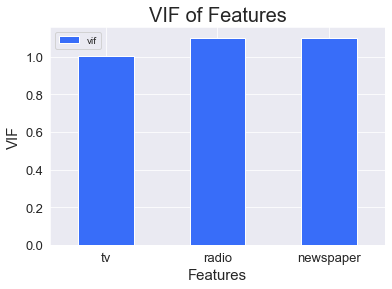

In [34]:
plt.figure(figsize=(10,4))
vif.plot(kind='bar', rot = 0, fontsize=13)
plt.xlabel('Features', fontsize=15)
plt.ylabel('VIF', fontsize=15)
plt.title('VIF of Features', fontsize=20)
plt.show()

In [35]:
vif

,vif
features,
tv,1.003318
radio,1.102134
newspaper,1.100842


### Observation
1. As VIF is less than 5, There is No multicollinearity in the data.

<h2><font color = "blue">10. Checking distribution for cleaned data</font></h2>

In [36]:
df5 = df4.copy()

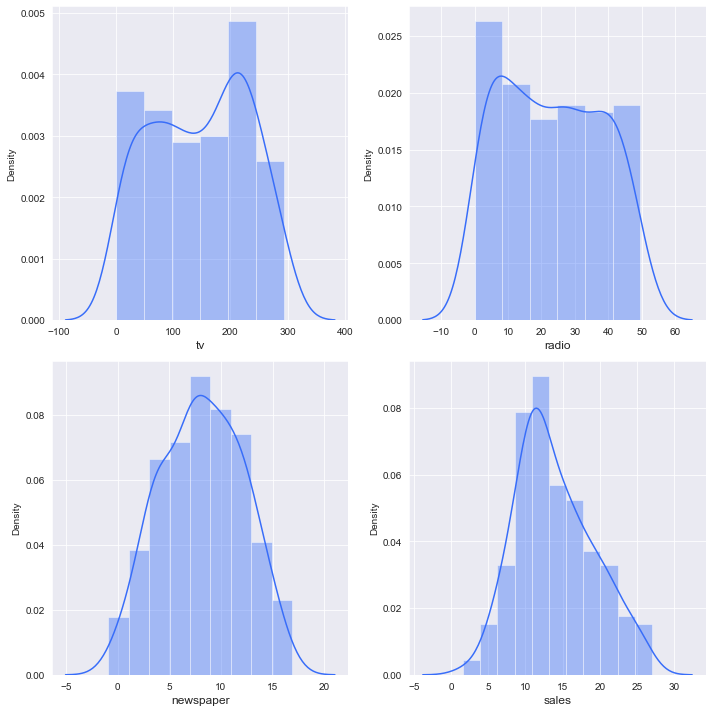

In [37]:
i=0
plt.figure(figsize=(10,10))
for column in df5[['tv', 'radio', 'newspaper', 'sales']].columns:
    plt.subplot(2,2,i+1)
    sns.distplot(df5[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

In [38]:
# this is to be used to check r_sqared value and p-values

lm = smf.ols(formula = 'sales ~ tv + radio + newspaper', data = df5).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.4
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           8.44e-95
Time:                        21:45:50   Log-Likelihood:                -383.25
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9092      0.357      8.142      0.000       2.204       3.614
tv             0.0457      0.001     32.291      0.000       0.043       0.048
radio          0.1877      0.009     22.022      0.000       0.171       0.205
newspaper      0.0036      0.032      0.113      0.910      -0.059       0.067
==============================================================================
Omnibus:                       58.989   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.591
Skew:                          -1.319   Prob(JB):                     6.60e-32
Kurtosis:                       6.232   Cond. No.                         508.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2><font color = "blue">11. Preparing data for ML model</font></h2>

## Applying StandardScaler..

In [39]:
x = df5.drop(columns=['sales'])
y = df5['sales']

In [40]:
Scaler = StandardScaler()
X_scaled = pd.DataFrame(Scaler.fit_transform(x), columns=x.columns)

In [41]:
X_scaled.head()

,tv,radio,newspaper
0,0.978697,0.989521,1.636691
1,-1.199012,1.090705,0.824808
2,-1.519332,1.535913,1.639734
3,0.056456,1.225616,1.297288
4,0.400243,-0.831784,1.293976


### Checking distribution after scaling..

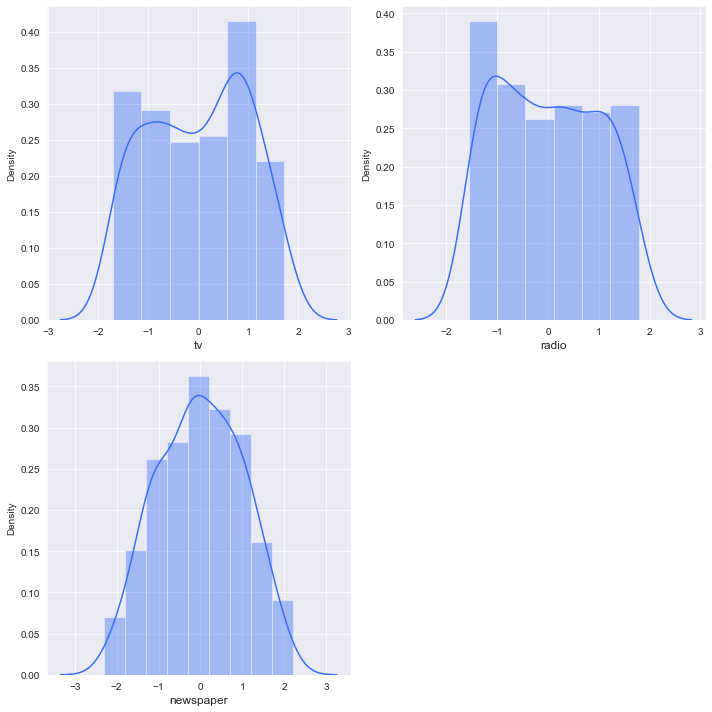

In [42]:
i=0
plt.figure(figsize=(10,10))
for column in X_scaled[['tv', 'radio', 'newspaper']].columns:
    plt.subplot(2,2,i+1)
    sns.distplot(X_scaled[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

<h1 align="center"><font color = "red">Model Selection</font> </h1>

<h2 align = 'center'><font color = "blue">Checking for Linear Regression algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [43]:
lr = LinearRegression()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [44]:
table[(-0.005 < table['diff_score']) & (table['diff_score'] < 0.005)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
34,34,0.893132,0.897861,-0.004729
88,88,0.894091,0.898249,-0.004158
46,46,0.893963,0.897799,-0.003836
51,51,0.893494,0.893855,-0.000361
77,77,0.893799,0.894088,-0.000289
55,55,0.894448,0.894591,-0.000143
60,60,0.893299,0.893148,0.000151
6,6,0.893849,0.893693,0.000156
38,38,0.895745,0.891962,0.003783


#### Best Random state is 55 for splitting data.

## Training the model..

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=55, test_size=.25)

===scores for training set===
r2 score for training set 0.8944481366818667
MAE for training set:  1.226201814635296
MSE for training set:  2.761514309565219
SMSE for training set:  1.6617804637090963
 
===scores for testing set===
r2 score for testing set :  0.8945914466570097
MAE for testing set:  1.355863584124825
MSE for testing set:  3.0350428119679735
SMSE for testing set:  1.742137426257749


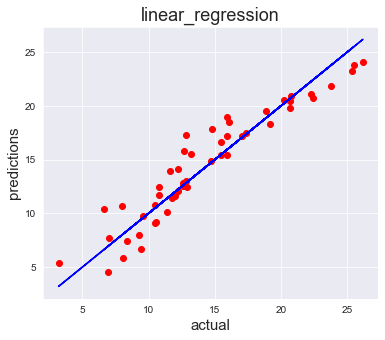

In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_test = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [47]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(lr, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.8889614061129034, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 4, cv_score is 0.8883964730592853, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 5, cv_score is 0.8857406146589945, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 6, cv_score is 0.8868941047683484, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 7, cv_score is 0.8840400627916499, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 8, cv_score is 0.8882618783932388, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 9, cv_score is 0.8812478781412287, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 10, cv_score is 0.8855266260381282, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 

at cv = 11, cv_score is 0.8772076402871772, train_accu is 0.8944481366818667, test_accu is 0.8945914466570097 


#### Best fold for cv is 3, but there isnt much difference between other folds as well hence we will select 5 as our CV fold.

In [48]:
cross_val_score(lr, X_scaled, y, cv = 5, scoring ='r2').mean()

0.8857406146589945

<h2 align = 'center'><font color = "blue">Checking for Lasso algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [49]:
ls = Lasso()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    ls.fit(x_train, y_train)
    pred_train = ls.predict(x_train)
    pred_test = ls.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [50]:
table[(-0.01 < table['diff_score']) & (table['diff_score'] < 0.01)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
88,88,0.825430,0.834707,-0.009277
3,3,0.803755,0.811019,-0.007264
72,72,0.817293,0.821644,-0.004350
55,55,0.820003,0.823731,-0.003728
38,38,0.827964,0.830053,-0.002089
12,12,0.821218,0.822112,-0.000894
74,74,0.782454,0.782346,0.000108
11,11,0.798504,0.797870,0.000634
20,20,0.804150,0.800172,0.003978
14,14,0.794972,0.790176,0.004796


#### Best Random state is 74 for splitting data.

## Training the model..

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=74, test_size=.25)

===scores for training set===
r2 score for training set 0.7824540306860646
MAE for training set:  1.6469872169162
MSE for training set:  5.088998811349486
SMSE for training set:  2.255880939089979
 
===scores for testing set===
r2 score for testing set :  0.7823463437553145
MAE for testing set:  2.150808725126189
MSE for testing set:  7.549413705070288
SMSE for testing set:  2.747619643449633


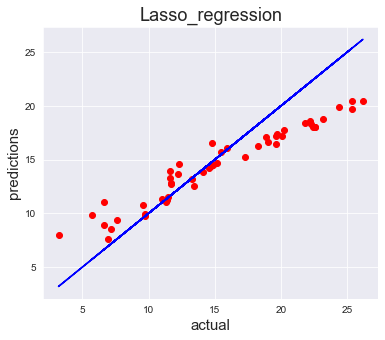

In [62]:
ls = Lasso()
ls.fit(x_train, y_train)
pred_test = ls.predict(x_test)
pred_train = ls.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Lasso_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [63]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(ls, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.8178584890361975, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 4, cv_score is 0.8152800487338876, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 5, cv_score is 0.8163649691832717, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 6, cv_score is 0.81310294519329, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 7, cv_score is 0.8098893042289045, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 8, cv_score is 0.8184278334446049, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 9, cv_score is 0.809739796582535, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 10, cv_score is 0.8144412465705712, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at cv = 11, cv_score is 0.8078633316311955, train_accu is 0.7824540306860646, test_accu is 0.7823463437553145 

at

#### Best fold for cv is 11, as corss val score at cv=11 is close to the test score.

In [64]:
cross_val_score(ls, X_scaled, y, cv = 11, scoring ='r2').mean()

0.8078633316311955

<h2 align = 'center'><font color = "blue">Checking for Ridge algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [65]:
rd = Ridge()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    rd.fit(x_train, y_train)
    pred_train = rd.predict(x_train)
    pred_test = rd.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [66]:
table[(-0.01 < table['diff_score']) & (table['diff_score'] < 0.01)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
72,72,0.891709,0.901054,-0.009346
92,92,0.891028,0.899639,-0.008611
12,12,0.893124,0.899378,-0.006254
34,34,0.893094,0.898401,-0.005307
16,16,0.893090,0.897738,-0.004648
88,88,0.894054,0.898338,-0.004284
46,46,0.893925,0.898090,-0.004165
77,77,0.893756,0.895247,-0.001491
51,51,0.893454,0.894815,-0.001360
55,55,0.894407,0.894895,-0.000487


#### Best Random state is 60 for splitting data.

## Training the model..

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=60, test_size=.25)

===scores for training set===
r2 score for training set 0.8932482156887002
MAE for training set:  1.2440631129645423
MSE for training set:  2.4732631484723457
SMSE for training set:  1.5726611677256948
 
===scores for testing set===
r2 score for testing set :  0.892829200832897
MAE for testing set:  1.3679019509600294
MSE for testing set:  3.931428304337403
SMSE for testing set:  1.9827829695499715


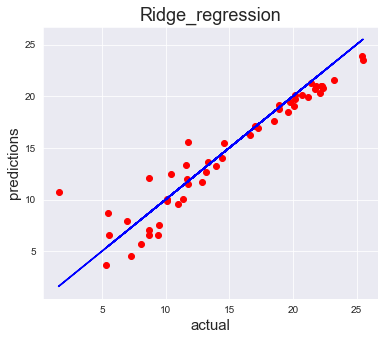

In [68]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_test = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Ridge_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [69]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(rd, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.8889652718867754, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 4, cv_score is 0.8883855256166289, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 5, cv_score is 0.8858278340182535, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 6, cv_score is 0.8868471402426068, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 7, cv_score is 0.8840495597794374, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 8, cv_score is 0.8883596599731567, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 9, cv_score is 0.8813209631321117, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 10, cv_score is 0.885649611111384, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 11, cv_score is 0.8773416920766014, train_accu is 0.8932482156887002, test_accu is 0.892829200832897 

at cv = 1

#### Best fold for cv is 3, but there isnt much difference between other folds as well hence we will select 4 as our CV fold.

In [70]:
cross_val_score(rd, X_scaled, y, cv = 4, scoring ='r2').mean()

0.8883855256166289

<h2 align = 'center'><font color = "blue">Checking for RandomForestRegressor algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [71]:
rfr = RandomForestRegressor()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    rfr.fit(x_train, y_train)
    pred_train = rfr.predict(x_train)
    pred_test = rfr.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [74]:
table[(-0.01 < table['diff_score']) & (table['diff_score'] < 0.01)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
74,74,0.995277,0.985539,0.009738


#### Best Random state is 74 for splitting data.

## Training the model..

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=74, test_size=.25)

===scores for training set===
r2 score for training set 0.9956761329071178
MAE for training set:  0.21318918918918828
MSE for training set:  0.1011471486486482
SMSE for training set:  0.31803639516358534
 
===scores for testing set===
r2 score for testing set :  0.9870343646170423
MAE for testing set:  0.5554199999999969
MSE for testing set:  0.4497188199999973
SMSE for testing set:  0.6706107813031321


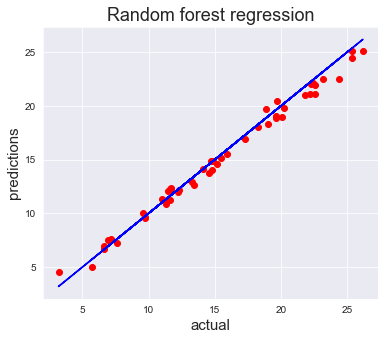

In [76]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_test = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Random forest regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [77]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(rfr, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.9745992836453065, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 4, cv_score is 0.9785876419655678, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 5, cv_score is 0.9763727057822592, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 6, cv_score is 0.9774370379645507, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 7, cv_score is 0.9774893808721872, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 8, cv_score is 0.9770794265316135, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 9, cv_score is 0.9772578388428946, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 10, cv_score is 0.9776244603943489, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 

at cv = 11, cv_score is 0.9761871217456666, train_accu is 0.9956761329071178, test_accu is 0.9870343646170423 


#### Best fold for cv is 4.

In [78]:
cross_val_score(rfr, X_scaled, y, cv = 4, scoring ='r2').mean()

0.9768689224188674

<h2 align = 'center'><font color = "blue">Checking for AdaBoostRegressor algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [79]:
abr = AdaBoostRegressor()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    abr.fit(x_train, y_train)
    pred_train = abr.predict(x_train)
    pred_test = abr.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [80]:
table[(-0.01 < table['diff_score']) & (table['diff_score'] < 0.01)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
74,74,0.970771,0.978414,-0.007642
42,42,0.974645,0.968996,0.005649
55,55,0.980505,0.973354,0.007151
23,23,0.975555,0.967092,0.008463
12,12,0.979570,0.970531,0.009039
46,46,0.975532,0.966315,0.009217
14,14,0.973027,0.963259,0.009768


#### Best Random state is 42 for splitting data.

## Training the model..

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=.25)

===scores for training set===
r2 score for training set 0.9739944193002691
MAE for training set:  0.685788530354128
MSE for training set:  0.6811060450068113
SMSE for training set:  0.8252914909332407
 
===scores for testing set===
r2 score for testing set :  0.9690242612053437
MAE for testing set:  0.7717108648366695
MSE for testing set:  0.8908831873337393
SMSE for testing set:  0.9438660854876285


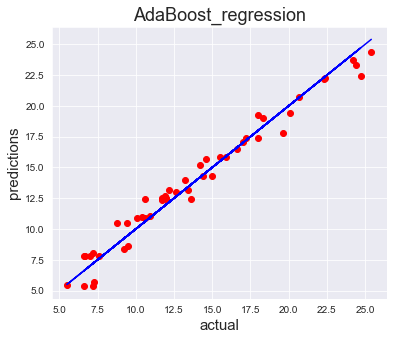

In [132]:
abr = AdaBoostRegressor()
abr.fit(x_train, y_train)
pred_test = abr.predict(x_test)
pred_train = abr.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('AdaBoost_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [133]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(abr, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.9542245624259132, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 4, cv_score is 0.9556833835696495, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 5, cv_score is 0.9556834739820733, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 6, cv_score is 0.9578917679725034, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 7, cv_score is 0.9575847388196478, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 8, cv_score is 0.9567724139159408, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 9, cv_score is 0.9555553002149291, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 10, cv_score is 0.9548766415595272, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 

at cv = 11, cv_score is 0.9541448294599619, train_accu is 0.9739944193002691, test_accu is 0.9690242612053437 


#### Best fold for cv is 6.

In [134]:
cross_val_score(abr, X_scaled, y, cv = 6, scoring ='r2').mean()

0.9565428384139771

<h2 align = 'center'><font color = "blue">Checking for GradientBoostingRegressor algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [85]:
gbr = GradientBoostingRegressor()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    gbr.fit(x_train, y_train)
    pred_train = gbr.predict(x_train)
    pred_test = gbr.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [86]:
table[(-0.012 < table['diff_score']) & (table['diff_score'] < 0.012)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
74,74,0.998513,0.988555,0.009958
34,34,0.998893,0.988788,0.010105
55,55,0.998656,0.988295,0.010361
58,58,0.998462,0.987190,0.011272
1,1,0.998623,0.987217,0.011406
32,32,0.998701,0.987222,0.011479
31,31,0.998437,0.986905,0.011532


#### Best Random state is 74 for splitting data.

## Training the model..

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=74, test_size=.25)

===scores for training set===
r2 score for training set 0.9985132937748448
MAE for training set:  0.1429922657517099
MSE for training set:  0.03477814935620773
SMSE for training set:  0.18648900599286738
 
===scores for testing set===
r2 score for testing set :  0.9883996077059888
MAE for testing set:  0.4774442857391935
MSE for testing set:  0.4023647572919595
SMSE for testing set:  0.6343222818819779


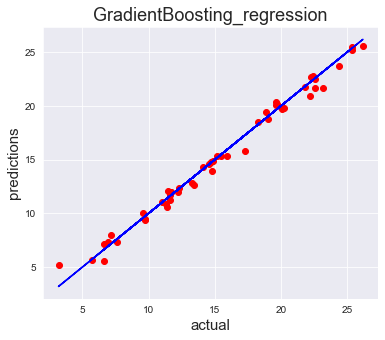

In [130]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_test = gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('GradientBoosting_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [89]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(gbr, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.9769926185786598, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 4, cv_score is 0.979226046892491, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 5, cv_score is 0.9781288449895659, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 6, cv_score is 0.9765219083756298, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 7, cv_score is 0.977174327342215, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 8, cv_score is 0.9785121437907469, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 9, cv_score is 0.9765241566202941, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 10, cv_score is 0.9790746700436619, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

at cv = 11, cv_score is 0.9792714245707507, train_accu is 0.9985132937748448, test_accu is 0.9886170199902365 

a

#### Best fold for cv is 4.

In [90]:
cross_val_score(gbr, X_scaled, y, cv = 4, scoring ='r2').mean()

0.9791323989665607

<h2 align = 'center'><font color = "blue">Checking for DecisionTreeRegressor algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [91]:
dt = DecisionTreeRegressor()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    dt.fit(x_train, y_train)
    pred_train = dt.predict(x_train)
    pred_test = dt.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [92]:
table[(-0.03 < table['diff_score']) & (table['diff_score'] < 0.03)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
74,74,1.0,0.974566,0.025434
72,72,1.0,0.972973,0.027027
10,10,1.0,0.972442,0.027558
69,69,1.0,0.971970,0.028030
81,81,1.0,0.970350,0.029650
94,94,1.0,0.970063,0.029937


#### Best Random state is 74.

## Training the model..

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=74, test_size=.25)

===scores for training set===
r2 score for training set 1.0
MAE for training set:  0.0
MSE for training set:  0.0
SMSE for training set:  0.0
 
===scores for testing set===
r2 score for testing set :  0.9769816987206507
MAE for testing set:  0.7520000000000003
MSE for testing set:  0.7984000000000004
SMSE for testing set:  0.8935323161475474


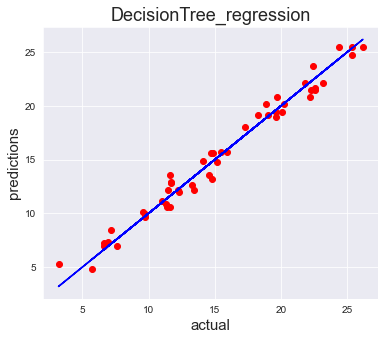

In [128]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_test = dt.predict(x_test)
pred_train = dt.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('DecisionTree_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [95]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(dt, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.9448241421715468, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 4, cv_score is 0.9413681393380715, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 5, cv_score is 0.9530712232082268, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 6, cv_score is 0.9378680712876938, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 7, cv_score is 0.948966268176542, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 8, cv_score is 0.9508950439894164, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 9, cv_score is 0.9436065002465737, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 10, cv_score is 0.9547551526769317, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 11, cv_score is 0.9418947865679633, train_accu is 1.0, test_accu is 0.9767222238815798 

at cv = 12, cv_score is 0.9465586172707089, train_accu is 1.0, test_accu is 0.9767222238815798 



#### Best fold for cv is 10.

In [96]:
cross_val_score(dt, X_scaled, y, cv = 10, scoring ='r2').mean()

0.9520451919220972

<h2 align = 'center'><font color = "blue">Checking for SVR algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [97]:
svr = SVR()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    svr.fit(x_train, y_train)
    pred_train = svr.predict(x_train)
    pred_test = svr.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [99]:
table[(-0.002 < table['diff_score']) & (table['diff_score'] < 0.002)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
21,21,0.911680,0.913239,-0.001558
91,91,0.912478,0.913679,-0.001201
55,55,0.908224,0.908436,-0.000212
23,23,0.916842,0.915503,0.001339
81,81,0.915089,0.913489,0.001600
60,60,0.898607,0.896921,0.001685


#### Best Random state is 55 for splitting data.

## Training the model..

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=55, test_size=.25)

===scores for training set===
r2 score for training set 0.908223968492019
MAE for training set:  0.8762799437692392
MSE for training set:  2.4011023237034403
SMSE for training set:  1.5495490710859854
 
===scores for testing set===
r2 score for testing set :  0.9084363142363183
MAE for testing set:  0.9538641405148195
MSE for testing set:  2.6364056568549517
SMSE for testing set:  1.6237012215475333


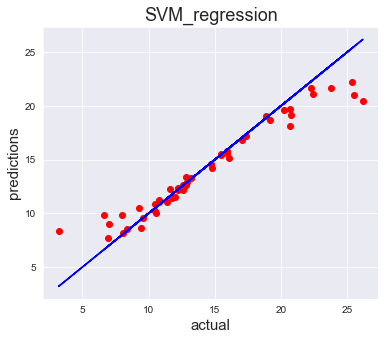

In [126]:
svr = SVR()
svr.fit(x_train, y_train)
pred_test = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('SVM_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [102]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(svr, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.88981945622717, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 4, cv_score is 0.8978806270851241, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 5, cv_score is 0.9041170072126675, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 6, cv_score is 0.9095413796185904, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 7, cv_score is 0.9065762269400526, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 8, cv_score is 0.9090554832010831, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 9, cv_score is 0.9113011335802861, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 10, cv_score is 0.9168539347597647, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 11, cv_score is 0.9147896221036486, train_accu is 0.908223968492019, test_accu is 0.9084363142363183 

at cv = 12

#### Best fold for cv is 8.

In [103]:
cross_val_score(svr, X_scaled, y, cv = 8, scoring ='r2').mean()

0.9090554832010831

<h2 align = 'center'><font color = "blue">Checking for KNeighborsRegressor algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [104]:
knn = KNeighborsRegressor()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    knn.fit(x_train, y_train)
    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [106]:
table[(-0.002 < table['diff_score']) & (table['diff_score'] < 0.002)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
65,65,0.949453,0.950361,-0.000908
1,1,0.952683,0.953312,-0.000629
4,4,0.955016,0.954461,0.000555
40,40,0.950878,0.949327,0.001551


#### Best Random state is 4.

## Training the model..

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=4, test_size=.25)

===scores for training set===
r2 score for training set 0.9550163467438197
MAE for training set:  0.7932432432432431
MSE for training set:  1.3317675675675678
SMSE for training set:  1.1540223427505933
 
===scores for testing set===
r2 score for testing set :  0.9544613933921186
MAE for testing set:  0.7156000000000001
MSE for testing set:  0.8221520000000001
SMSE for testing set:  0.9067259784521452


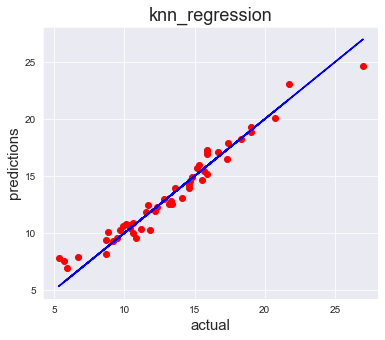

In [122]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_test = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knn_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [123]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(knn, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.915762942793629, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 4, cv_score is 0.9363932686673537, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 5, cv_score is 0.9358043941034188, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 6, cv_score is 0.9331598005696677, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 7, cv_score is 0.9368853208336503, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 8, cv_score is 0.9349213385654551, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 9, cv_score is 0.9329595673012181, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 10, cv_score is 0.942525208572151, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at cv = 11, cv_score is 0.938901618448411, train_accu is 0.9550163467438197, test_accu is 0.9544613933921186 

at

#### Best fold for cv is 10.

In [124]:
cross_val_score(knn, X_scaled, y, cv = 10, scoring ='r2').mean()

0.942525208572151

<h2 align = 'center'><font color = "blue">Checking for XGBRegressor algorithm..</font></h2>

## Finding random state to get best split for traing & testing sets

In [111]:
xgb = XGBRegressor()
train = []
test = []
diff = []
randomstate = []
for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    xgb.fit(x_train, y_train)
    pred_train = xgb.predict(x_train)
    pred_test = xgb.predict(x_test)

    train.append(r2_score(y_train, pred_train))
    test.append(r2_score(y_test, pred_test))
    diff.append(r2_score(y_train, pred_train) - r2_score(y_test, pred_test))
    randomstate.append(i)
    
table = pd.DataFrame(list(zip(randomstate, train, test, diff)),
                              columns =['randomstate', 'train_score', 'test_score', 'diff_score'])
#                               index=pd.RangeIndex(start=1, stop=(len(randomstate)+1), name='Sr. No.'))

In [112]:
table[(-0.015 < table['diff_score']) & (table['diff_score'] < 0.015)].sort_values(by=['diff_score', 'train_score', 'test_score'])

,randomstate,train_score,test_score,diff_score
34,34,1.0,0.988350,0.011650
21,21,1.0,0.987548,0.012452
55,55,1.0,0.987146,0.012854
32,32,1.0,0.985755,0.014245


#### Best Random state is 34.

## Training the model..

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=34, test_size=.25)

===scores for training set===
r2 score for training set 0.999999920042977
MAE for training set:  0.001062152353492964
MSE for training set:  2.200162443477109e-06
SMSE for training set:  0.0014832944560932968
 
===scores for testing set===
r2 score for testing set :  0.9883495870013942
MAE for testing set:  0.4353957672119141
MSE for testing set:  0.2866665671197941
SMSE for testing set:  0.5354125205108619


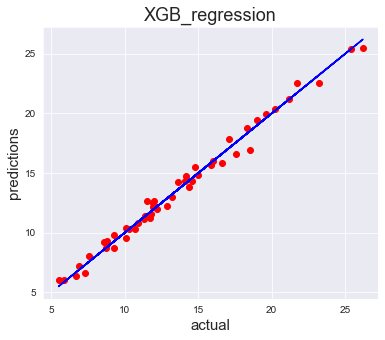

In [139]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
pred_test = xgb.predict(x_test)
pred_train = xgb.predict(x_train)
print('===scores for training set===')
print('r2 score for training set', r2_score(y_train, pred_train))
print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
print('MSE for training set: ', mean_squared_error(y_train, pred_train))
print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
print(' ')
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('XGB_regression', fontsize = 18)
plt.show()

## Cross validation of the model

In [140]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_test, pred_test)
for j in range(3,13):
    cv_score = cross_val_score(xgb, X_scaled, y, cv = j)
    cv_mean = cv_score.mean()
    print(f'at cv = {j}, cv_score is {cv_mean}, train_accu is {train_accuracy}, test_accu is {test_accuracy} \n')

at cv = 3, cv_score is 0.9644331884525448, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 4, cv_score is 0.9699633492985051, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 5, cv_score is 0.9691752518103274, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 6, cv_score is 0.9672402232736711, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 7, cv_score is 0.9682480403763378, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 8, cv_score is 0.9730275265603796, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 9, cv_score is 0.9733982839741208, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 10, cv_score is 0.9752092237667288, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 11, cv_score is 0.9710102020820691, train_accu is 0.999999920042977, test_accu is 0.9883495870013942 

at cv = 

#### Best fold for cv is 10.

In [141]:
cross_val_score(xgb, X_scaled, y, cv = 10, scoring ='r2').mean()

0.9752092237667288

- model--------------mae--------r2--------cross val
1. xgb--------------	     0.435-------   0.988-------	 0.975
2. gbr--------------	     0.474-------   0.989-------	 0.979
3. rfr----------------	     0.555-------   0.987-------	 0.977
4. knn--------------	     0.715-------   0.954-------   0.942
5. dt--------------	-     0.726-------   0.977-------   0.952
6. adaboost------ 0.864-------	 0.772-------	 0.969
7. svr--------------	     0.953-------	 0.908-------	 0.909
8. linear-----------1.356-------	 0.895-------	 0.886
9. rd--------------	     1.367-------	 0.893-------	 0.888
10. lasso----------	 2.150-------	 0.782-------	 0.808

### Observation
1. Out of all XGBoost has minimum MAE value & R2 score & Cross value score are high & close to each other. We will select XGBoost for Hyperparameter tuning.

<h1 align="center"><font color = "red">Hyperparameter tuning using GridSearchCV</font> </h1>

In [156]:
parameters = {'max_depth': range (2, 10, 1),
              'n_estimators': range(40, 800, 40),
              'learning_rate': [0.1, 0.01, 0.05]}

In [157]:
grd = GridSearchCV(xgb, param_grid = parameters, cv =10, verbose=True, n_jobs=-1)

In [158]:
best_clf = grd.fit(x_train,y_train)

Fitting 10 folds for each of 456 candidates, totalling 4560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 510 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 860 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1310 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2510 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4110 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4560 out of 4560 | elapsed:  4.1min finished


In [159]:
best_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [160]:
best_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 160}

===scores for testing set===
r2 score for testing set :  0.9891214056511041
MAE for testing set:  0.4395194492340088
MSE for testing set:  0.2676754289706294
SMSE for testing set:  0.5173735874304267


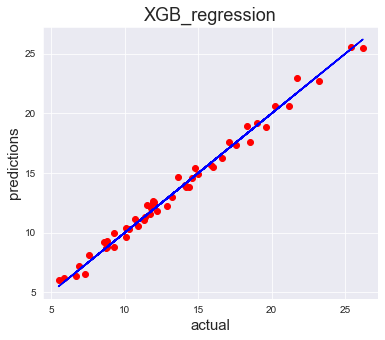

In [161]:
xgb = XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 160)
xgb.fit(x_train, y_train)
pred_test = xgb.predict(x_test)
pred_train = xgb.predict(x_train)
print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('XGB_regression', fontsize = 18)
plt.show()

In [162]:
cross_val_score(xgb, X_scaled, y, cv = 10, scoring ='r2').mean()

0.9785541085966907

### Observation
1. After Hyperparameter tuning MAE value decrease & R2 score & Cross value score increased.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [164]:
filename='Advertising.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [166]:
log =pickle.load(open('Advertising.pkl','rb'))
score=log.score(x_test, y_test)
print(score*100)

98.9121405651104
